#**Lab 07-5 Fashion MNIST introduction**

* ### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)
print(tf.__version__)

2.4.0


##**모델 설계에 사용할 Data**

* Tensorflow 2.0 버전에 맞게 Keras를 활용한 Fashion MNIST를 분류 모델로 생성

##**학습에 쓰이는 Data**

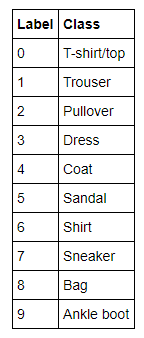

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Rullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


* Fashion MNIST Data 확인 - 4번째 배열 드레스

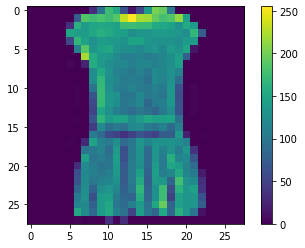

In [3]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

##**Tensorflow Keras**

**위 Data를 기준으로 분류 모델을 생성**

* 0~1 사이의 값으로 정규화 및 Data 출력


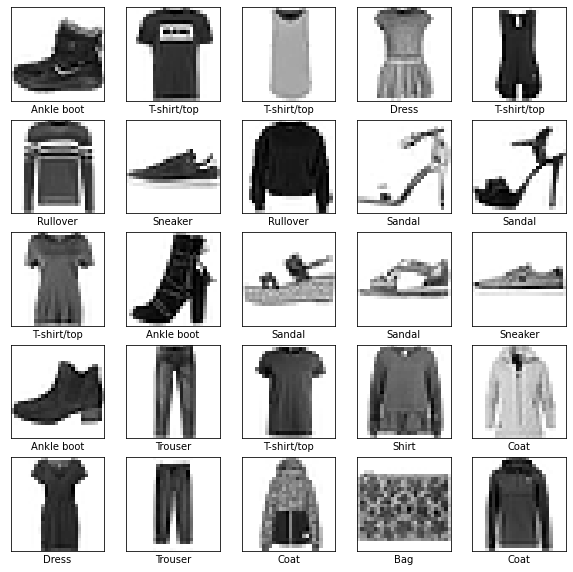

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

* Tensorflow keras API를 통해 모델에 대한 정의

In [5]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(128, activation=tf.nn.relu),
   keras.layers.Dense(10, activation=tf.nn.softmax)
])

* Adam Optimizer와 Cross Entropy Loss 선언
* 5 Epoch로 학습할 Data로 학습 수행

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6454 - accuracy: 0.7788
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3900 - accuracy: 0.8589
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8906


* 모델을 평가할 Test 데이터에 대한 정의

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8748
Test accuracy: 0.8748000264167786
